# Abalone -Plotting

## Learning Objectives
By the end of this lesson, you'll be able to:

**Use Pandas to:**
- Create a histogram

**Use matplotlib to:**
- Create scatter plots (colored by category)
- Create side-by-side histograms
- Create stacked histograms
- Create side-by-side bar plots
- Understand the different paradigms for interacting with the matplotlib API

**Use Seaborn to:**
- Create pair plots
- Create heatmaps
- Create distplots

**Customize plots by setting:**
- Axis labels
- Titles
- Figure size
- Text size for labels/titles
- Tick size
- A custom legend

**Do other general visualization tasks like:**
- Saving plots
- Making markdown tables
- Inserting images and links into notebooks

## Our Data

Data and descriptions come from [UCI](https://archive.ics.uci.edu/ml/datasets/Abalone). The short and sweet: abalone are aquatic gastropods with colorful shells.

The data description file shared on UCI doesn't render very well in markdown: 

Name		Data Type	Meas.	Description
----		---------	-----	-----------
Sex		nominal			M, F, and I (infant)
Length		continuous	mm	Longest shell measurement
Diameter	continuous	mm	perpendicular to length
Height		continuous	mm	with meat in shell
Whole weight	continuous	grams	whole abalone
Shucked weight	continuous	grams	weight of meat
Viscera weight	continuous	grams	gut weight (after bleeding)
Shell weight	continuous	grams	after being dried
Rings		integer			+1.5 gives the age in years

##### Let's go ahead and fix this by using markdown formatting for a table:

```
| These | are | column | names |
| --- | --- | --- | --- |   <--- This row is necessary to establish that it's a table
| 0 | a | 123.45 | None |
| integers | text | floats | Cells of a markdown table can contain any data type |
| - | - | - | Blank cells will render in some interpreters, but not others. |
```

- Columns will scale automatically to the best size for the contained data. Tables can render differently in Jupyter notebooks, Jupyter lab, and Github, so it's always good to check your formatting between these different environments.
- The 2nd line always needs at least 3 hyphens between each pipe for each column. You can add as many as you want if you'd like your table to be better formatted in plain text preview. 
- Pipes (vertical bars) define columns. You need a space between your pipes and cell contents. A line break defines a new row.

Which renders like this in markdown:

| These | are | column | names |
| --- | --- | --- | --- |
| 0 | a | 123.45 | None |
| integers | text | floats | Cells of a markdown table can contain any data type |
| - | - | - | Blank cells will render in some interpreters, but not others. |

### Markdown Table:

| Name | Data Type | Meas. | Description |
| ---- | --------- | ----- | ----------- |
| Sex | nominal | - | M, F, and I (infant) |
| Length | continuous | mm | Longest shell measurement |
| Diameter | continuous | mm | perpendicular to length |
| Height | continuous | mm | with meat in shell |
| Whole weight | continuous | grams | whole abalone |
| Shucked weight | continuous | grams | weight of meat |
| Viscera weight | continuous | grams | gut weight (after bleeding) |
| Shell weight | continuous | grams | after being dried |
| Rings | integer | -  | +1.5 gives the age in years |

This is an abalone:

![abalone inside](./images/abalone_inside.jpg)
[(Source)](https://commons.wikimedia.org/wiki/File:AbaloneInside.jpg)

## Imports
Below we import matplotlib, numpy, Pandas, and Seaborn (each with the standard alias). We also use a Jupyter notebook magic to have our plots render in our Jupyter environment.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preview, load, and clean data

We can run unix commands in our Jupyter notebooks by starting a command with `!`. This is a great way to preview our data before loading it into memory.

### Preview data:

Use the `head` command to look at our file `./data/abalone_data.csv`:

In [119]:
# !head ./data/abalone_data.csv

As we can see, there's no header included in this file. Let's keep this in mind as we load our data into Pandas.

### Load data:
Use `pd.read_csv` with the option `header=None` to load the data. Save this to the variable `df`:

In [120]:
df = pd.read_csv('abalone_data.csv', header=None)

In [121]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


It looks like our data loaded successfully, but we don't have our column names. **Best practice dictates that pandas column names are all lower case without spaces.** Here's a properly formatted list of the column names:
```
['sex', 'length', 'diameter', 'height', 'whole_weight', 
 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
```

### Change column names:
We can just assign a list to `df.columns` to overwrite our current column names. Do that here:

In [122]:
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 
              'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

In [123]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


`df.info()` gives us a very brief summary of our data.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


`df.describe()` gives us some quick summary stats for our numeric variables.

In [125]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


While our data description states that our units of length are in millimeters and our units of weight are in grams, our values are *tiny*. Further review of the data description reveals that all our continuous values have been scaled by dividing by 200. Let's undo this operation so that we have interpretable units.

In [126]:
#Can specify columns with particular datatypes!

df[df.select_dtypes('float64').columns] = df.select_dtypes('float64') * 200

In [127]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,M,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,F,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,M,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7


Great! As we can see, we have no missing data, human-readable (and programmatically friendly) column names, and all of the data is in the correct format as specified by our data description above. **Let's plot**.

## Summary Visualizations

### Pandas histogram:
All `pandas` plotting functionality calls `matplotlib` in the background and sets some default settings. Generally speaking, `pandas` should be used to quickly preview plots that you'll build out from scratch in another plotting module, as many of the defaults it sets are infuriating and misleading.

Let's visualize the distribution of our variable of interest, `rings`. Pandas has great built in functionality to do this by just calling `.hist()`. **Best practice is to incrementally build out a finalized plot.** Let's do the following:

1. Call `.hist()`
2. Adjust our figure size.
3. Adjust our number of bins (we'll use 28 as this is our max-min over a small range).
4. Add a title (format text size).
5. Add axes labels (format text size)

**NOTE**: By adding a `;` to the last line, we can suppress output while still seeing the generated plot.

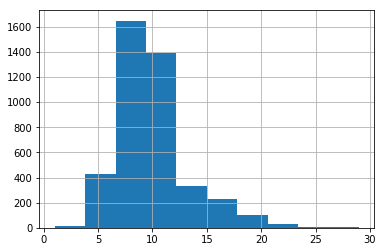

In [128]:
#A basic histogram
df.rings.hist();

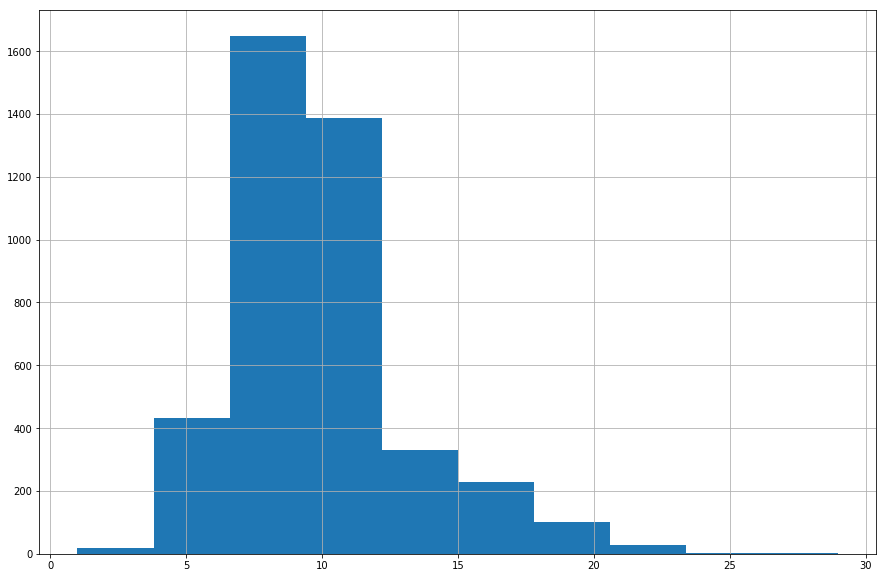

In [129]:
plt.figure(figsize=(15,10))   #This line uses matplotlib to specify the size of the plot we want
df.rings.hist()

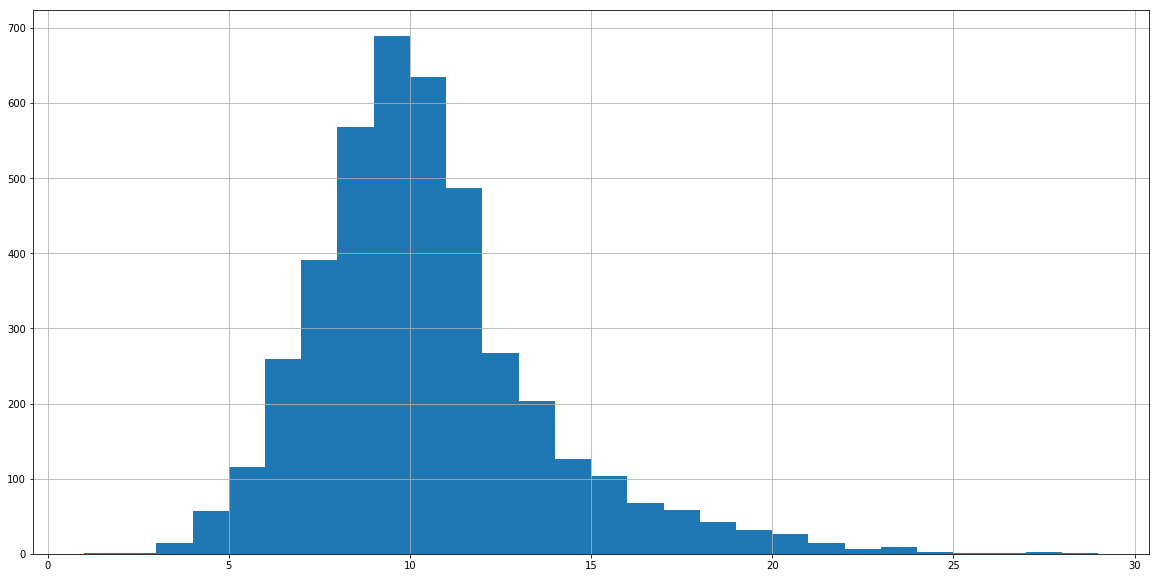

In [130]:
plt.figure(figsize=(20,10))  #specifies the size
df.rings.hist(bins=28)  #expresses how many bins - how many sections to split the data up into

Text(0.5, 1.0, 'Count of Samples by Number of Rings')

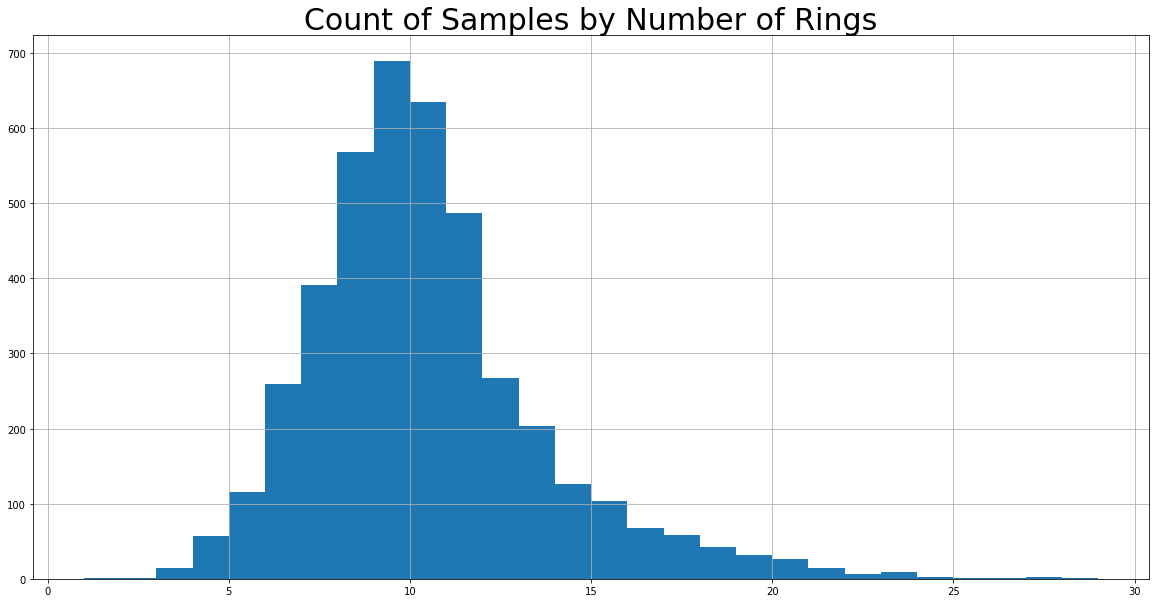

In [131]:
plt.figure(figsize=(20,10))
df.rings.hist(bins=28)
plt.title('Count of Samples by Number of Rings', fontsize=30) #Adds a title to the graph

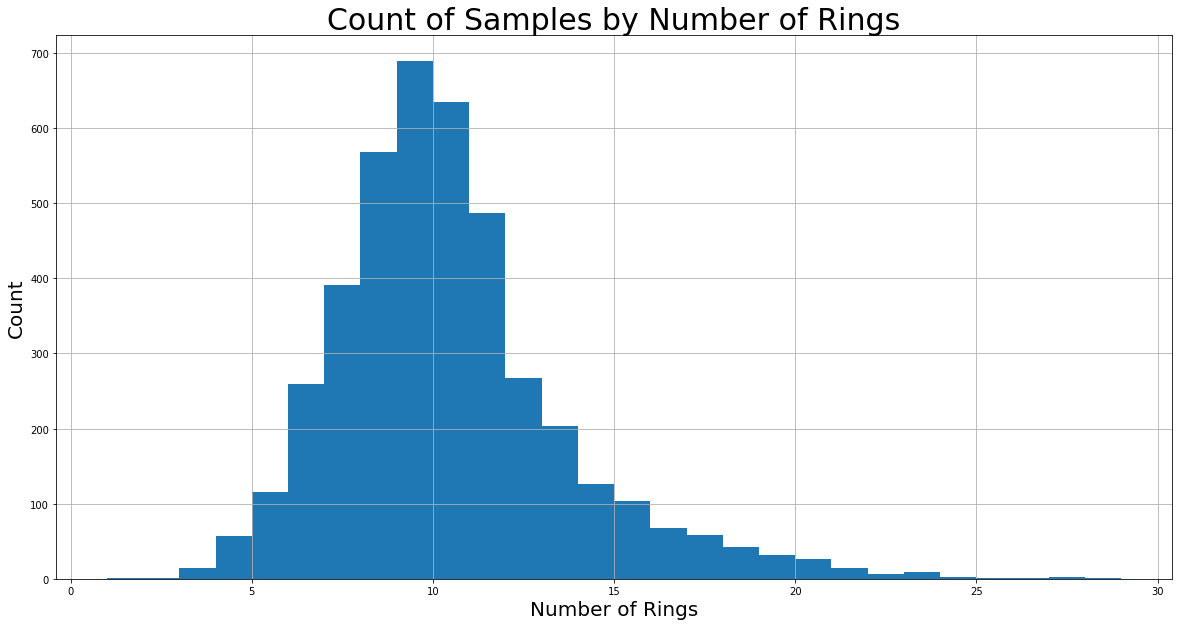

In [132]:
plt.figure(figsize=(20,10))
df.rings.hist(bins=28)
plt.title('Count of Samples by Number of Rings', fontsize=30)  #graph title
plt.xlabel('Number of Rings', fontsize=20)  #label on the x-axis
plt.ylabel('Count', fontsize=20); #label on the y-axis

#### Let's make an annotated Bar Graph of the 'rings' column and another for the 'sex' column:

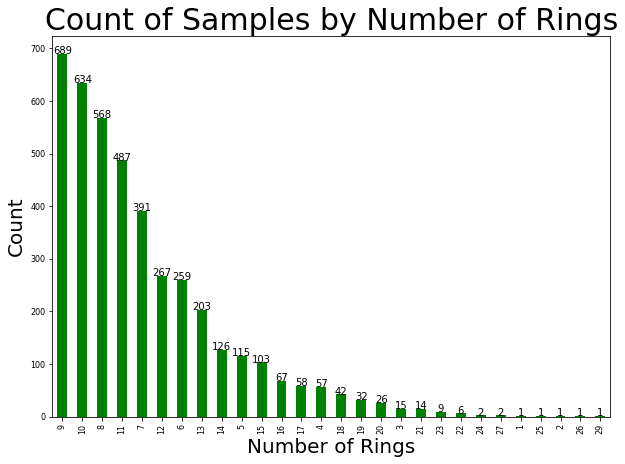

In [134]:
df['rings'].value_counts().plot(kind = 'bar', figsize= (10, 7), color = 'green', fontsize = 8)
for a, b in zip(range(len(set(df['rings']))), list(df['rings'].value_counts())):
    plt.text(a, b, str(b), ha = 'center')

plt.title('Count of Samples by Number of Rings', fontsize=30)  #graph title
plt.xlabel('Number of Rings', fontsize=20)  #label on the x-axis
plt.ylabel('Count', fontsize=20); #label on the y-axis

First line: takes the value_counts of the rings column, says that we want to plot it, specifies the kind of plot, how big we want it, what color we want the bars to be, how big we want our font to be.
second line: assigning to variables to unpack this zipped items. We get the range of the number of rings we want to display on our graph, and the value counts for each unique number of rings

In [135]:
for a, b in zip(range(len(set(df['rings']))), list(df['rings'].value_counts())):
    print(a, b)

0 689
1 634
2 568
3 487
4 391
5 267
6 259
7 203
8 126
9 115
10 103
11 67
12 58
13 57
14 42
15 32
16 26
17 15
18 14
19 9
20 6
21 2
22 2
23 1
24 1
25 1
26 1
27 1


Let's do the same thing for the 'sex' column

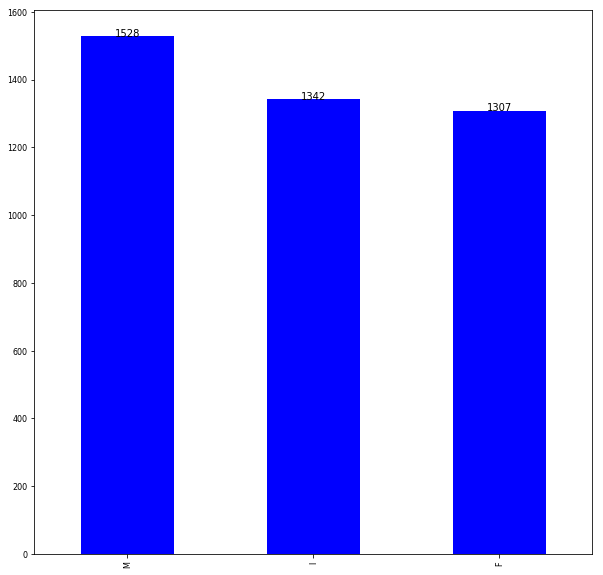

In [136]:
fig = df['sex'].value_counts().plot(kind = 'bar', figsize= (10, 10), color = 'blue', fontsize = 8)
for a, b in zip(range(len(set(df['sex']))), list(df['sex'].value_counts())):
    plt.text(a, b, str(b), ha = 'center')

### Seaborn pairplot:
With a dataset with few numeric features of interest, seaborn's pairplot function can give you an extremely quick overview of your data (**but does not scale well to data with many numeric features**). Let's try it below:

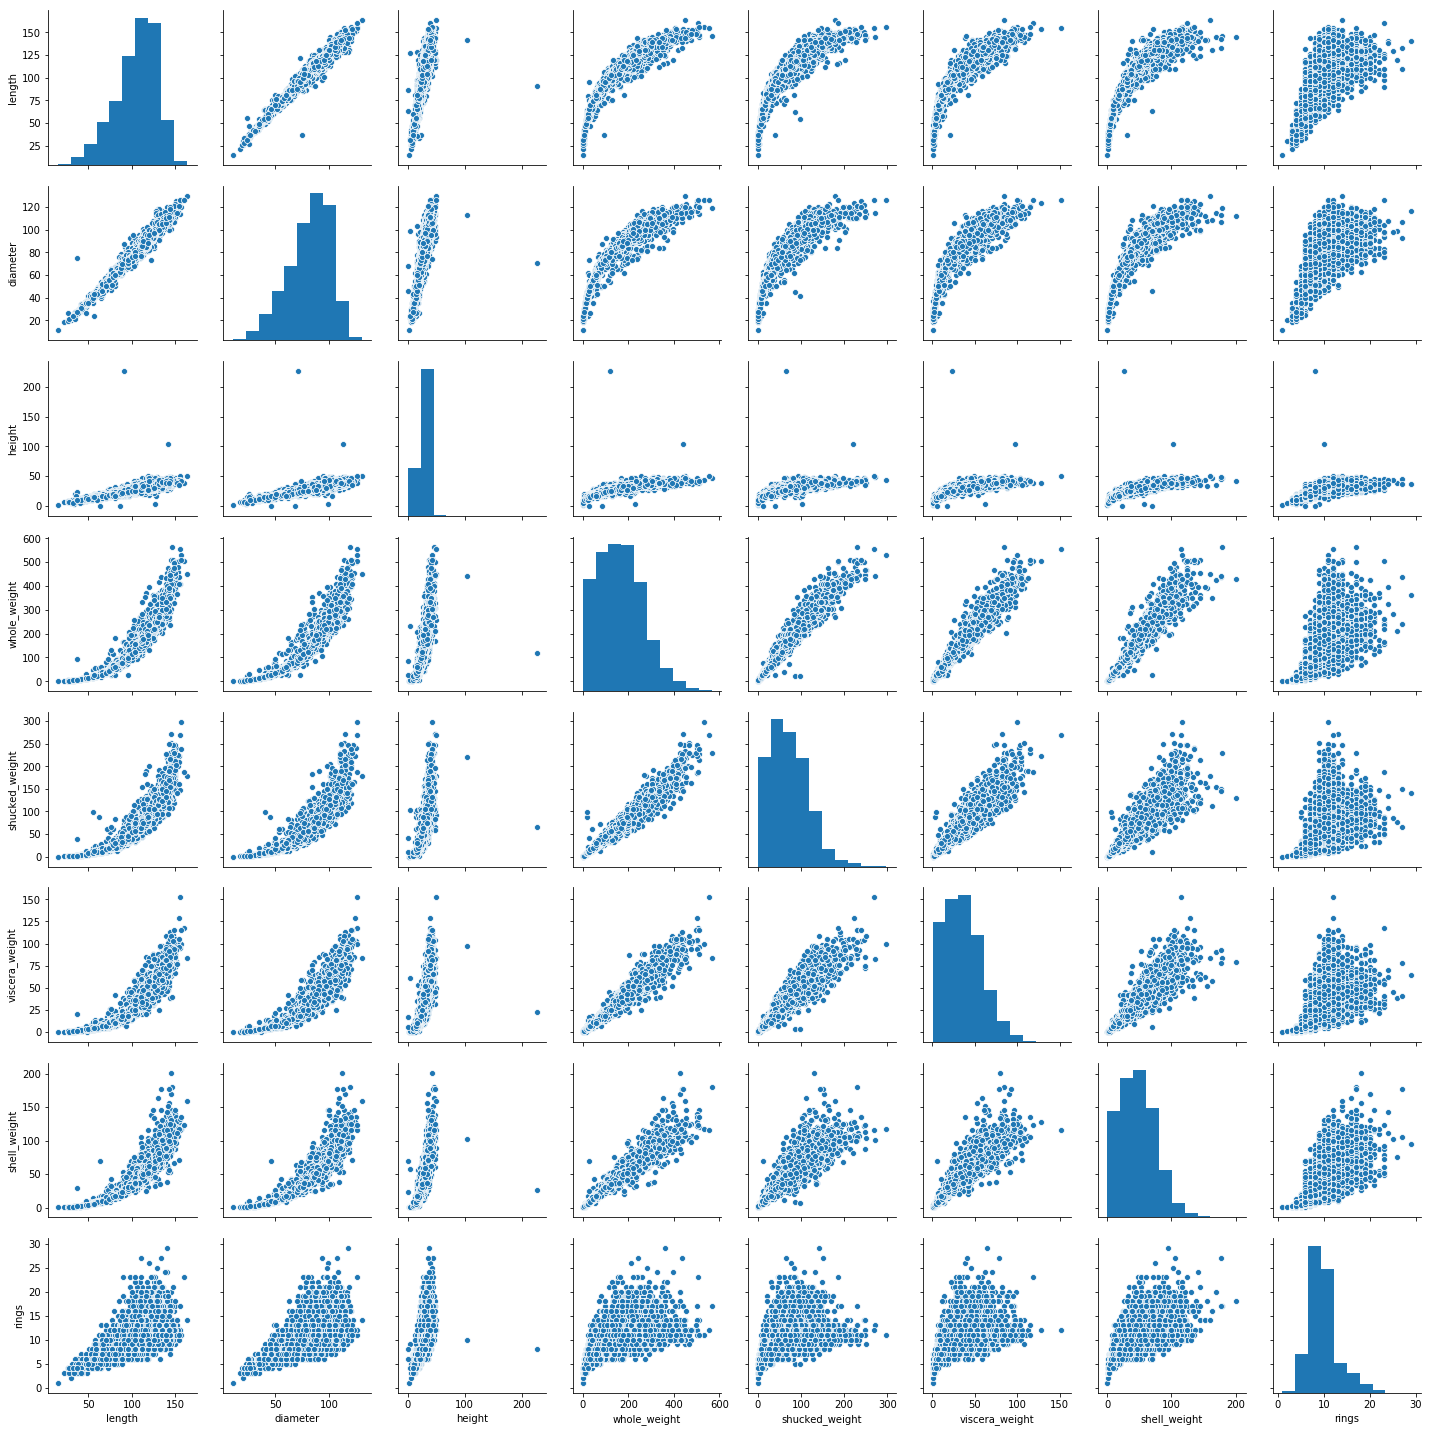

In [137]:
sns.pairplot(df)

Even with only 8 numeric columns, it's difficult to see the specifics of many of these plots. However, we can quickly gather that there are strong relationships between many of our features, and that we have a few outliers in a couple of our features that are making it more difficult to see some of these relationships. 

Note that we can choose to pass a limited subset of features, which may increase interpretability.

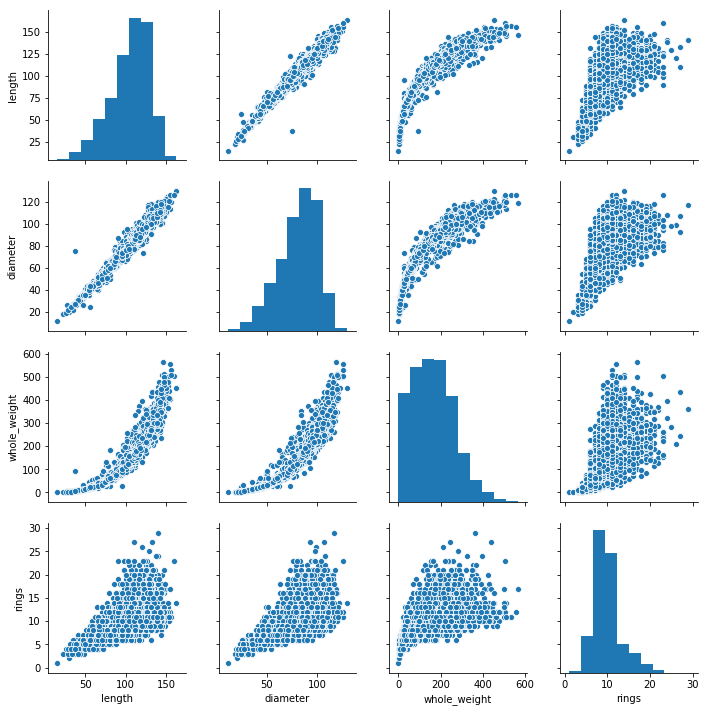

In [138]:
sns.pairplot(df[['length', 'diameter', 'whole_weight', 'rings']])

### Seaborn heatmap with pandas correlation:
Pairing `sns.heatmap()` with pandas `.corr()` method allows us to quickly see some of the relationships in our data.

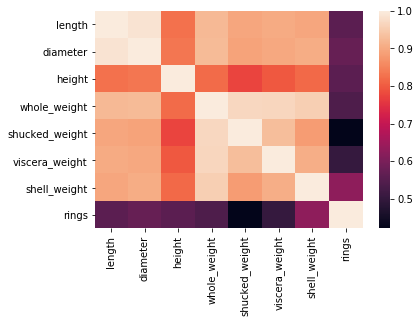

In [139]:
sns.heatmap(df.corr())

This can be improved upon **drastically**. Let's:

1. Increase the figure size.
2. Add a title.
3. Add annotations.
4. Set annotation size.
5. Set x and y tick size.
6. Set x and y tick orientation.
7. Mask upper right triangle.
8. Order rows and columns by correlation with our target, rings.
9. Drop tick labels where masked (*note* that heatmap is indexed top to bottom and left to right)
10. Change the colormap. (Resources: [Seaborn tutorial](https://seaborn.pydata.org/tutorial/color_palettes.html), [matplotlib tutorial](https://matplotlib.org/users/colormaps.html))

**Note that it may take 20-40+ minutes to generate a plot that is appropriate for inclusion in a report or presentation.** This is a worthwhile investment of your time if the plot is important to the story you're telling. *If a plot isn't important to your narrative, you might be better off removing it entirely.*

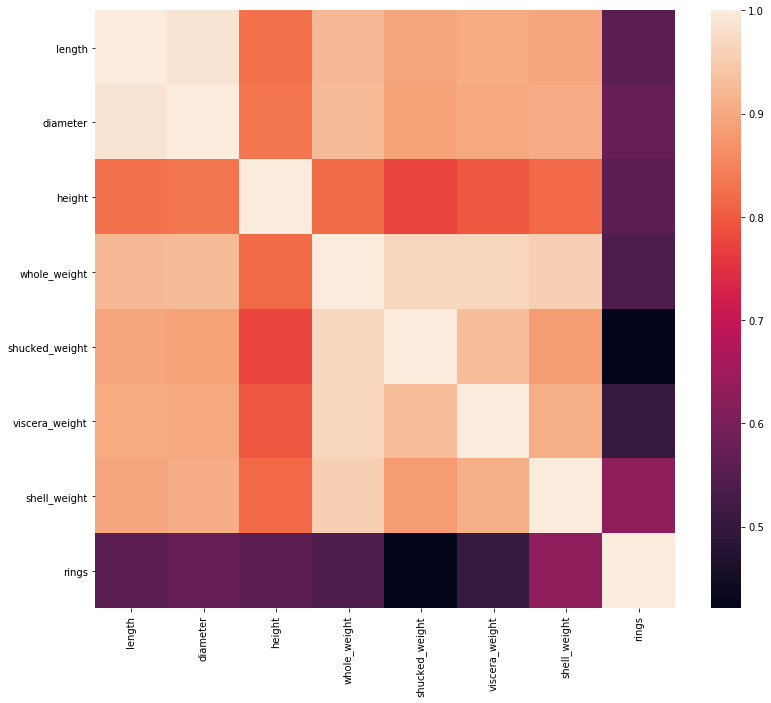

In [140]:
plt.figure(figsize=(13,11))
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Correlation of Abalone Traits')

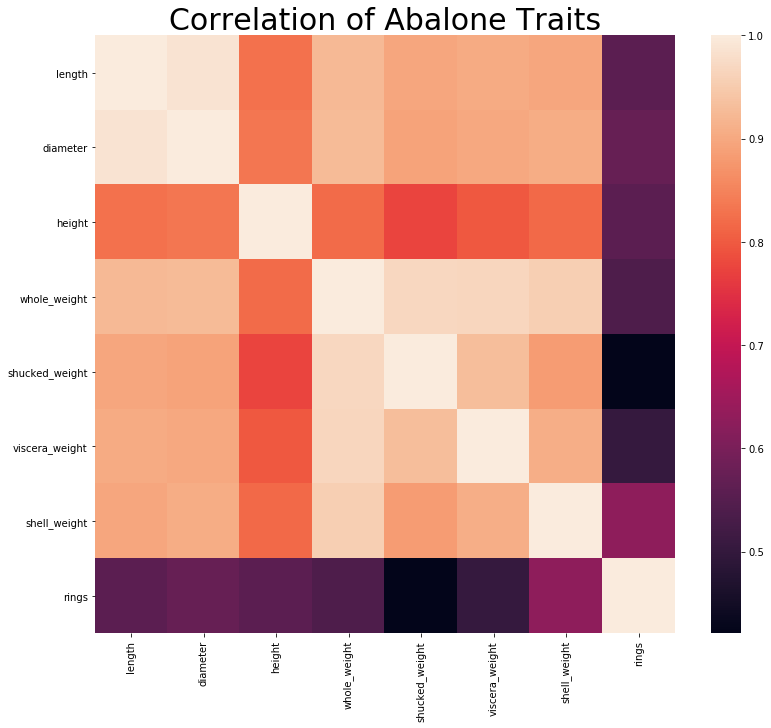

In [141]:
plt.figure(figsize=(13,11))
ax = sns.heatmap(df.corr())   #need to set to a variable name so we can use set_title in the next line
ax.set_title('Correlation of Abalone Traits', fontsize=30)

Text(0.5, 1.0, 'Correlation of Abalone Traits')

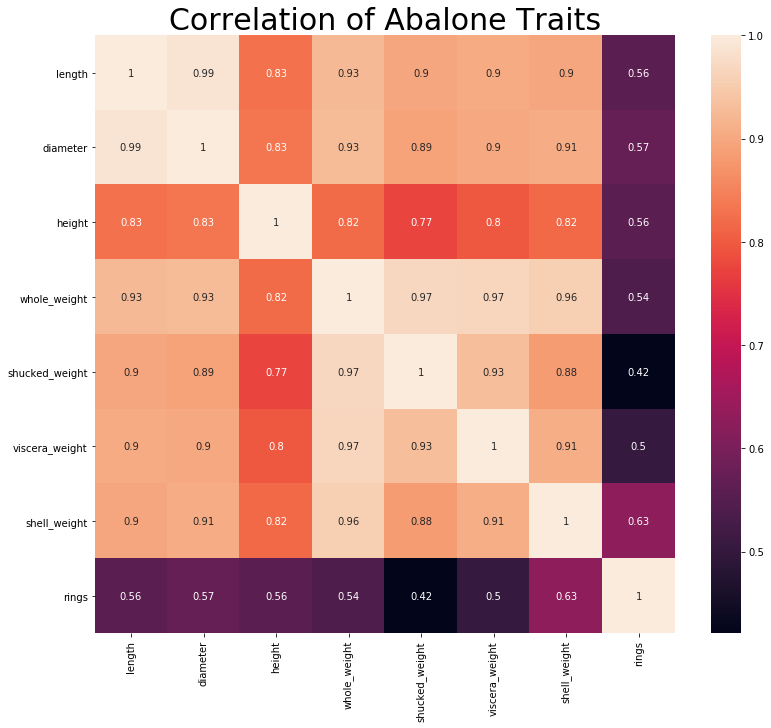

In [142]:
plt.figure(figsize=(13,11))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('Correlation of Abalone Traits', fontsize=30)

Text(0.5, 1.0, 'Correlation of Abalone Traits')

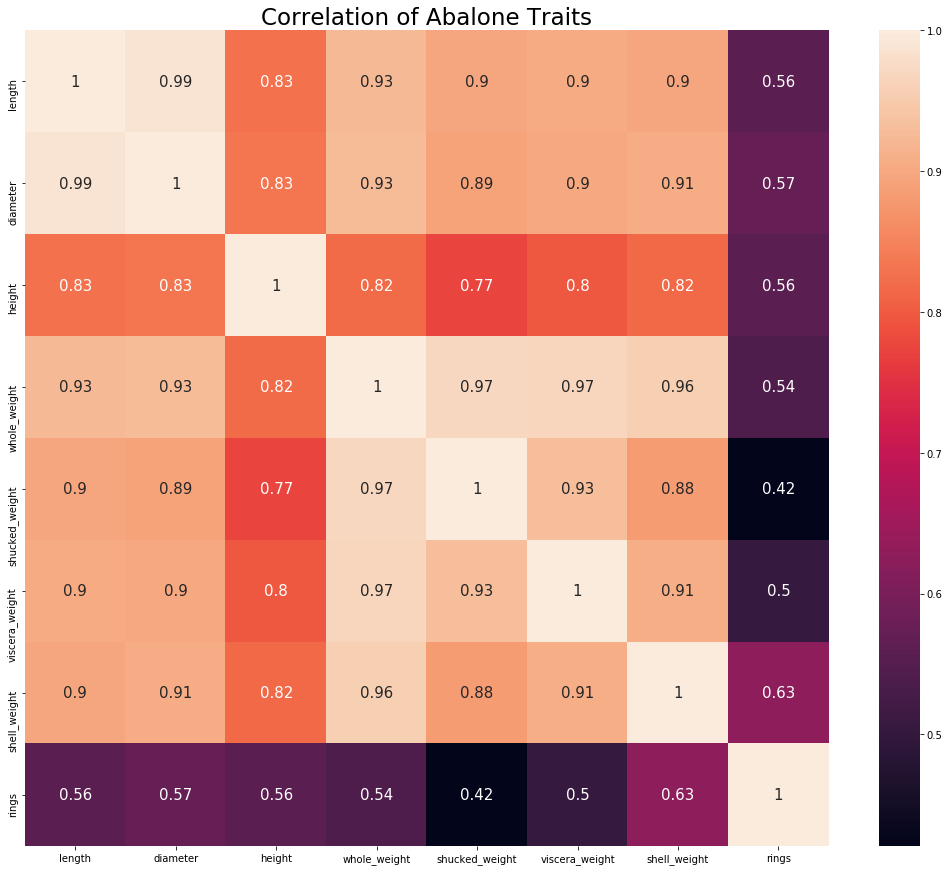

In [143]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(df.corr(), annot=True, annot_kws={"size":15})  #the 3rd argument tells how large we want our font to be within the heatmap
ax.set_title('Correlation of Abalone Traits', fontsize=23)

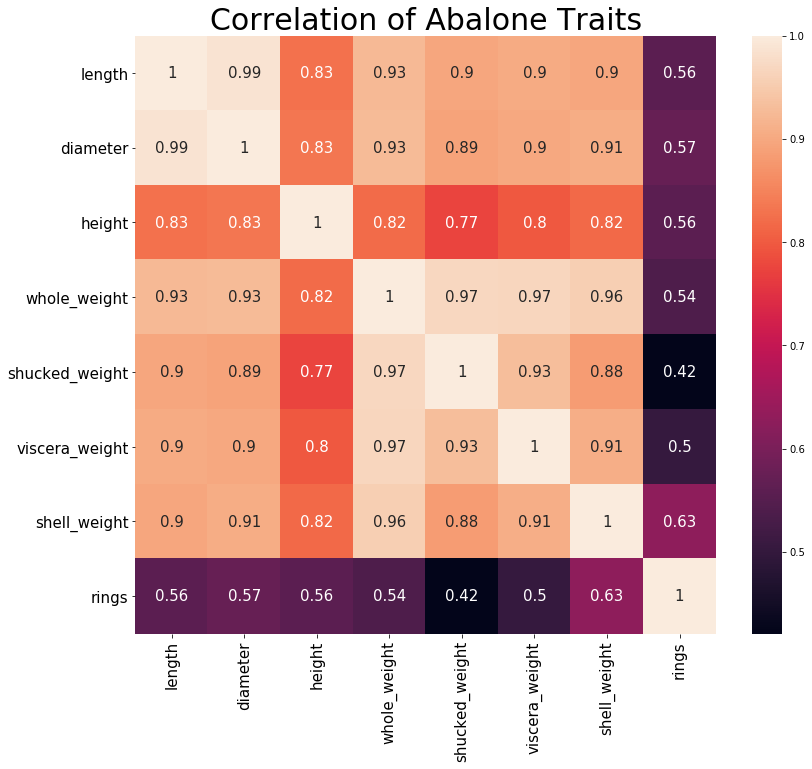

In [144]:
plt.figure(figsize=(13,11))
ax = sns.heatmap(df.corr(), annot=True, annot_kws={"size":15}) #if you want correlation strength and change the font size
ax.set_title('Correlation of Abalone Traits', fontsize=30)
ax.tick_params(axis='both', labelsize=15)   #if you want to change the font size of the axes

In [145]:
# mask = np.zeros_like(df.corr())
# mask
# mask[np.triu_indices_from(mask)]   #https://docs.scipy.org/doc/numpy/reference/generated/numpy.triu_indices_from.html

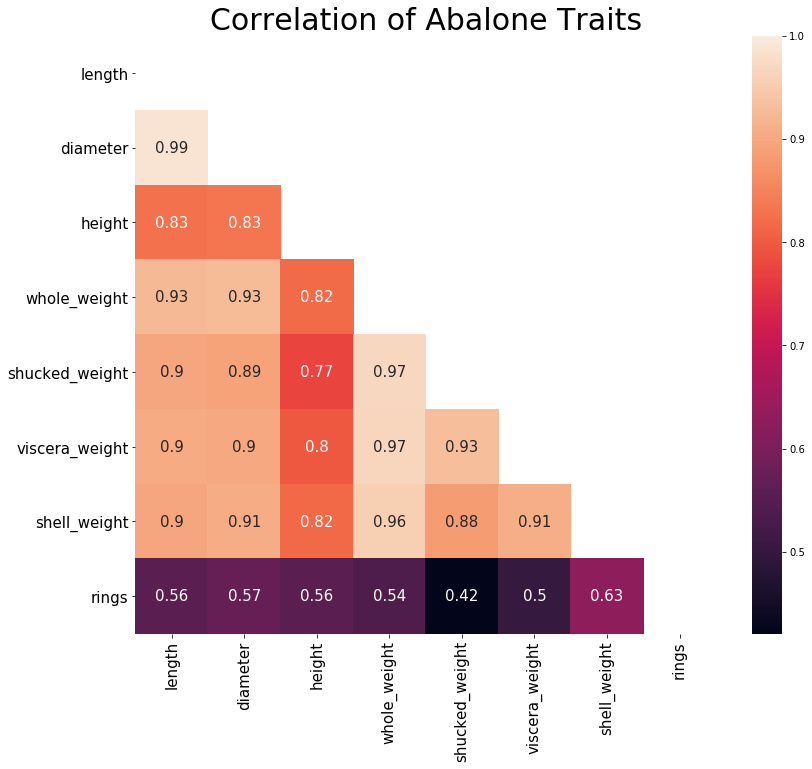

In [146]:
plt.figure(figsize=(13,11))  #specify figsize

#create a mask to conceal the upper right hand triangle of the heatmap
mask = np.zeros_like(df.corr())   
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df.corr(), annot=True, annot_kws={"size":15}, mask = mask) #if you want correlation strength and change the font size
ax.set_title('Correlation of Abalone Traits', fontsize=30)
ax.tick_params(axis='both', labelsize=15)   #if you want to change the font size of the axes


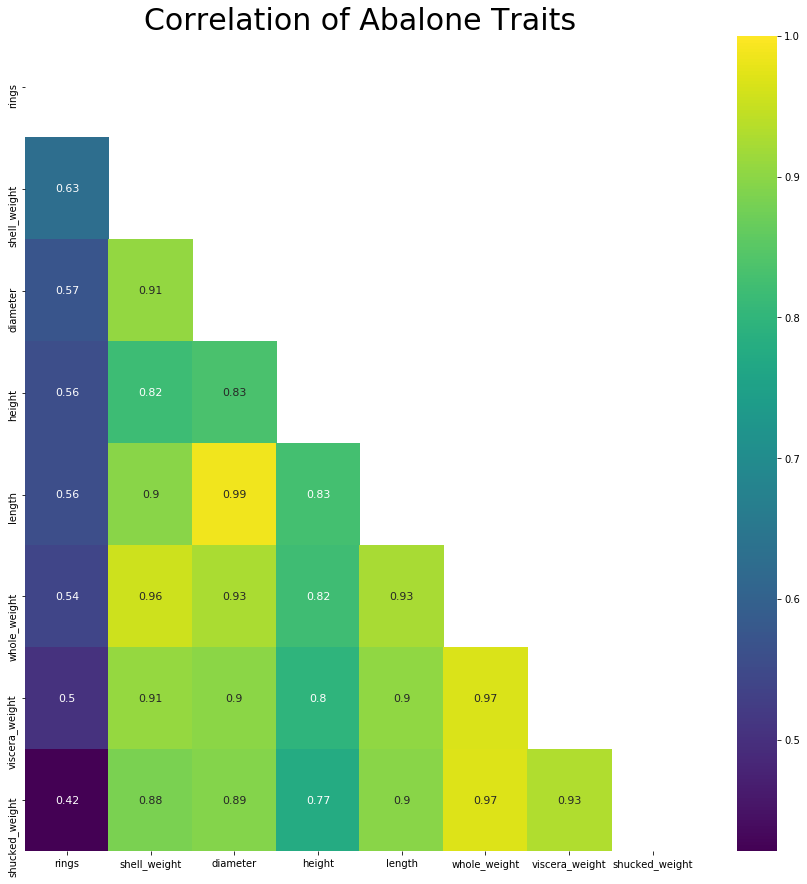

In [150]:
plt.figure(figsize=(15,15)) #need to specify fig if you want to save the figure somewhere on your computer
col_order = df.corr().sort_values('rings', ascending=False).index  #This is going to specify how to order your heatmap
#if you want your first column to be in order of descending correlation coefs

ax = sns.heatmap(df[col_order].corr(), 
                 annot=True, 
                 annot_kws={"size":11}, 
                 mask=mask, 
                 cmap='viridis')  #can play around with different colors...  
ax.set_title('Correlation of Abalone Traits', fontsize=30)

plt.savefig('my_figure.png')  #this should then be saved as a png in the folder I'm working in


Text(0.5, 1.0, 'Correlation of Abalone Traits')

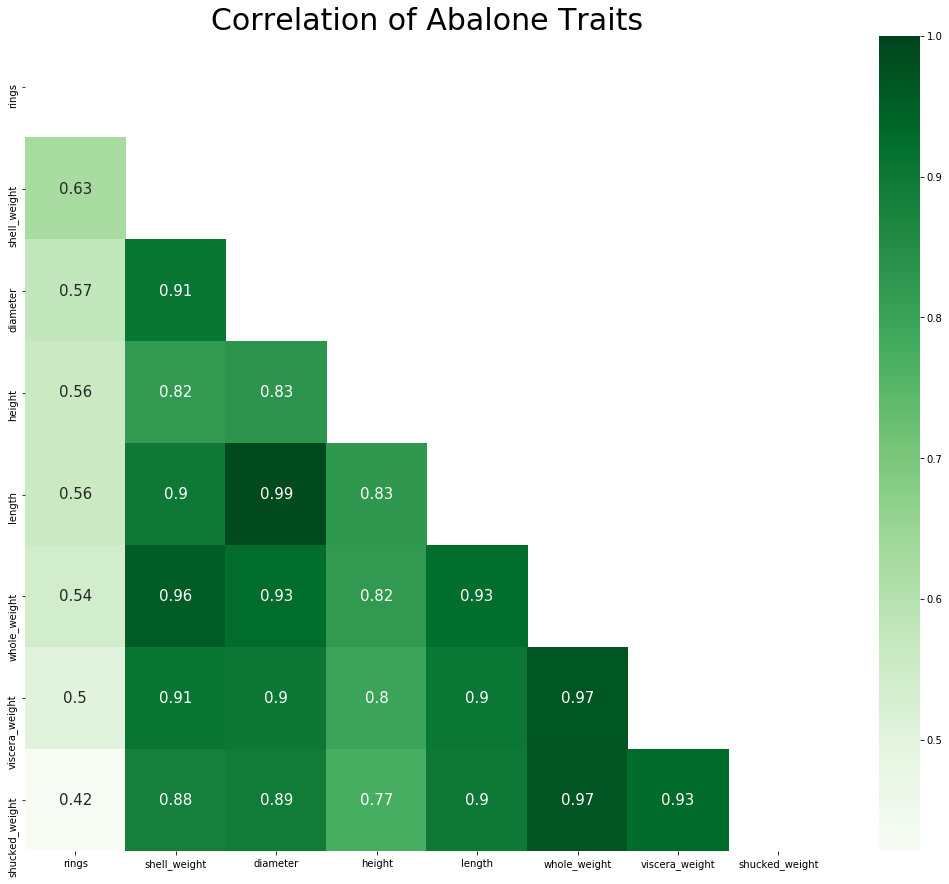

In [152]:
fig = plt.figure(figsize=(18,15))
col_order = df.corr().sort_values('rings', ascending=False).index
ax = sns.heatmap(df[col_order].corr(), 
                 annot=True, 
                 annot_kws={"size":15}, 
                 mask=mask,
                 cmap='Greens')

ax.set_title('Correlation of Abalone Traits', fontsize=30)

Why is this plot so much better than the original?

1. **No redundant information is displayed**<br> - Each relationship is only shown once<br> - Correlations with self are suppressed<br> - White space is minimized (empty columns/rows removed)
2. **All text is readable**
3. **Colors are informative**<br> - A single color linear palette is used<br> - Darker colors show higher correlation
4. **Relationships are ordered**<br> - Our row labels and first column immediately allow us to see which features are most highly correlated to our target<br> - From left to right, our columns follow this same order

Of course, the best thing we could do here would be to build this out as a reusable function so we never need to go through this process again. (Consider doing this for your own purposes and take ownership of this code.)